In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')

In [3]:
transaction = pd.read_excel(data, 'Transactions', skiprows=1)
transaction

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [4]:
columns_drop = ["transaction_date", "product_first_sold_date"]
transaction.drop(columns_drop, axis = 1, inplace=True)
transaction

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
0,1,2,2950,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62
1,2,3,3120,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92
2,3,37,402,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82
3,4,88,3135,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10
4,5,78,787,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48
...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40
19996,19997,41,127,1.0,Approved,Solex,Road,medium,medium,416.98,312.74
19997,19998,87,2284,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71
19998,19999,6,2764,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73


In [5]:
customerdemographic = pd.read_excel(data, "CustomerDemographic", skiprows=1)

C:\Users\dongv\AppData\Local\Temp\ipykernel_9568\1985388101.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  customerdemographic = pd.read_excel(data, "CustomerDemographic", skiprows=1)


In [6]:
len(customerdemographic['DOB'].unique())

3449

In [7]:
customerdemographic['DOB_Clean']= pd.to_datetime(customerdemographic['DOB'])

In [8]:
customerdemographic['age']= 2020-pd.DatetimeIndex(customerdemographic['DOB_Clean']).year

<function matplotlib.pyplot.show(close=None, block=None)>

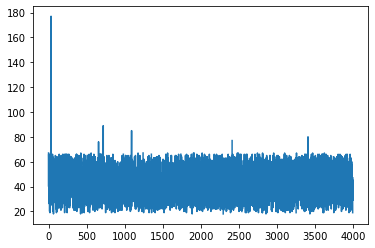

In [9]:
plt.plot(customerdemographic['age'])
plt.show

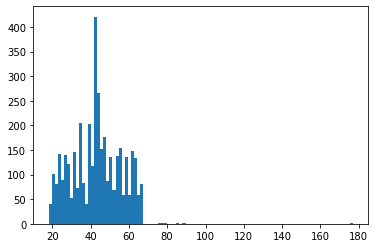

In [10]:
plt.hist(customerdemographic['age'], bins=100)
plt.show()

In [11]:
customerdemographic = customerdemographic[customerdemographic['age']<100]

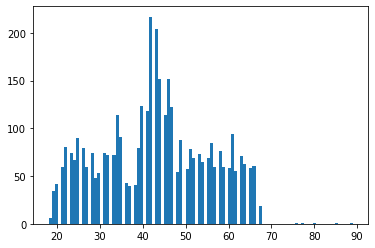

In [12]:
plt.hist(customerdemographic['age'], bins=100)
plt.show()

In [13]:
customerdemographic.columns


Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'DOB_Clean', 'age'],
      dtype='object')

In [14]:
customerdemographic= customerdemographic[['customer_id', 'gender', 'past_3_years_bike_related_purchases', 
                                           'job_title', 'job_industry_category', 'wealth_segment',
                                          'deceased_indicator', 'owns_car', 'tenure', 'age']]

In [15]:
customerdemographic

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67.0
1,2,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40.0
2,3,Male,61,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66.0
3,4,Male,33,NaN,IT,Mass Customer,N,No,7.0,59.0
4,5,Female,56,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,43.0
...,...,...,...,...,...,...,...,...,...,...
3994,3995,Male,93,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0,45.0
3995,3996,Female,8,VP Product Management,Health,Mass Customer,N,No,19.0,45.0
3996,3997,Female,87,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,19.0
3998,3999,Male,11,NaN,Manufacturing,Affluent Customer,N,Yes,10.0,47.0


In [16]:
merge = transaction.join(customerdemographic.set_index('customer_id'), on='customer_id')

In [17]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       20000 non-null  int64  
 1   product_id                           20000 non-null  int64  
 2   customer_id                          20000 non-null  int64  
 3   online_order                         19640 non-null  float64
 4   order_status                         20000 non-null  object 
 5   brand                                19803 non-null  object 
 6   product_line                         19803 non-null  object 
 7   product_class                        19803 non-null  object 
 8   product_size                         19803 non-null  object 
 9   list_price                           20000 non-null  float64
 10  standard_cost                        19803 non-null  float64
 11  gender                      

In [18]:
address = pd.read_excel(data, 'CustomerAddress', skiprows=1, )

In [19]:
address= address[['customer_id', 'state', 'property_valuation']]

In [20]:
merge.join(address.set_index('customer_id'), on='customer_id')

,transaction_id,product_id,customer_id,online_order,order_status,brand,product_line,product_class,product_size,list_price,...,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,state,property_valuation
0,1,2,2950,0.0,Approved,Solex,Standard,medium,medium,71.49,...,19.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,65.0,VIC,6.0
1,2,3,3120,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,...,89.0,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,41.0,NSW,5.0
2,3,37,402,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,...,9.0,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0,43.0,NSW,1.0
3,4,88,3135,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,...,83.0,Staff Scientist,Financial Services,Mass Customer,N,No,16.0,58.0,NSW,10.0
4,5,78,787,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,...,29.0,NaN,Retail,Affluent Customer,N,Yes,2.0,24.0,NSW,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,...,1.0,Help Desk Operator,Manufacturing,Mass Customer,N,Yes,7.0,26.0,VIC,10.0
19996,19997,41,127,1.0,Approved,Solex,Road,medium,medium,416.98,...,81.0,Compensation Analyst,Financial Services,Mass Customer,N,No,19.0,46.0,QLD,1.0
19997,19998,87,2284,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,...,83.0,Staff Accountant IV,Telecommunications,High Net Worth,N,No,14.0,46.0,VIC,1.0
19998,19999,6,2764,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,...,12.0,NaN,Financial Services,Mass Customer,N,Yes,20.0,65.0,QLD,1.0


In [21]:
merge.columns

Index(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age'],
      dtype='object')

In [22]:
drop = ['product_id', 'transaction_id', 'customer_id', 'order_status', 'deceased_indicator']
merge.drop(drop, axis =1, inplace=True)

In [23]:
merge

,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
0,0.0,Solex,Standard,medium,medium,71.49,53.62,Male,19.0,Software Engineer I,Financial Services,Mass Customer,Yes,10.0,65.0
1,1.0,Trek Bicycles,Standard,medium,large,2091.47,388.92,Female,89.0,Clinical Specialist,Health,Mass Customer,Yes,10.0,41.0
2,0.0,OHM Cycles,Standard,low,medium,1793.43,248.82,Male,9.0,Desktop Support Technician,Retail,Affluent Customer,No,22.0,43.0
3,0.0,Norco Bicycles,Standard,medium,medium,1198.46,381.10,Male,83.0,Staff Scientist,Financial Services,Mass Customer,No,16.0,58.0
4,1.0,Giant Bicycles,Standard,medium,large,1765.30,709.48,Female,29.0,NaN,Retail,Affluent Customer,Yes,2.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.0,OHM Cycles,Standard,high,medium,2005.66,1203.40,Male,1.0,Help Desk Operator,Manufacturing,Mass Customer,Yes,7.0,26.0
19996,1.0,Solex,Road,medium,medium,416.98,312.74,Female,81.0,Compensation Analyst,Financial Services,Mass Customer,No,19.0,46.0
19997,1.0,OHM Cycles,Standard,medium,medium,1636.90,44.71,Female,83.0,Staff Accountant IV,Telecommunications,High Net Worth,No,14.0,46.0
19998,0.0,OHM Cycles,Standard,high,medium,227.88,136.73,Female,12.0,NaN,Financial Services,Mass Customer,Yes,20.0,65.0
